# Continuous Random Variable

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

## 7.1 One-dimentional continuous random variable

### 7.1.1 Definition of one-dimentional continuous random variable
- Random variable : interval [a, b]
- f(x) = PDF : probability density function

In [ ]:
x_range = np.array([0, 1])

In [ ]:
def f(x) :
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else :
        return 0


In [8]:
# The combination of x_range + function f : probability distribution

X = [x_range, f]

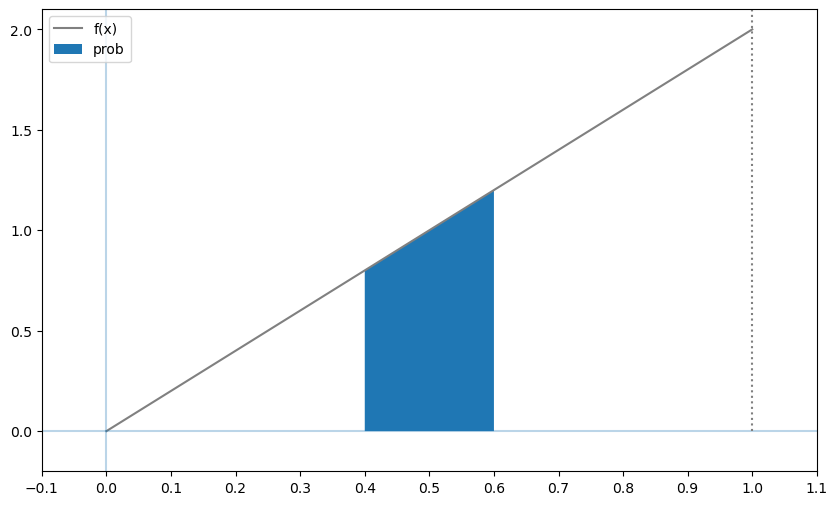

In [9]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [ ]:
# The first argument is the integrand, and the second and third arguments are the limits of integration.
integrate.quad(f, 0.4, 0.6)

# 적분값 : 0.2

(0.200, 0.000)

In [ ]:
# 1) f(x) >= 0
from scipy.optimize import minimize_scalar

# minimum
res = minimize_scalar(f)
res.fun

0

In [ ]:
# 2) 면적이 1
integrate.quad(f, -np.inf, np.inf)[0]

1.000

- CDF

In [13]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

F(0.6) - F(0.4)

0.200

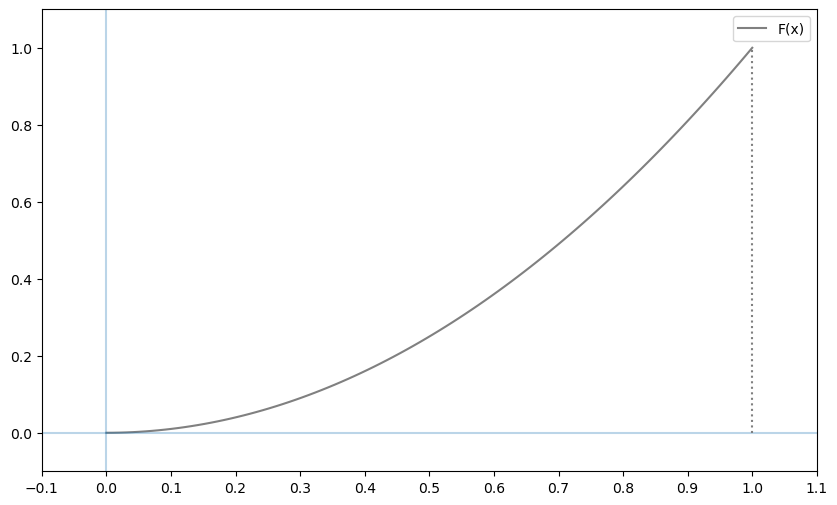

In [14]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

- Transformation of a random variable

In [ ]:
y_range = [3, 5]

# PDF
def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0

# CDF
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

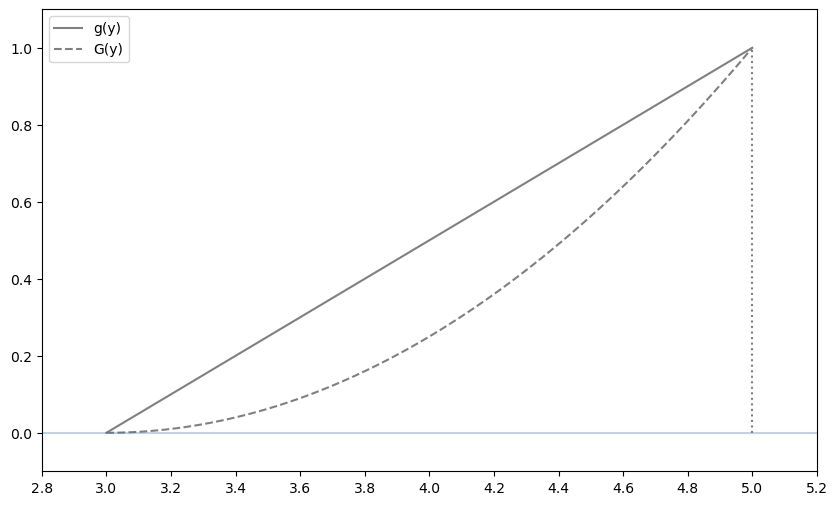

In [18]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 7.1.2. Measures of a one-dimensional discrete random variable

- Expected value

In [20]:
def integrand(x) :
    return x * f(x) 

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [25]:
# transformation of random variable

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]


In [26]:
E(X)

0.667

In [27]:
E(X, g = lambda x : 2*x + 3)

4.333

In [28]:
2 * E(X) + 3

4.333

- Covariance

In [29]:
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [30]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [31]:
V(X)

0.056

In [32]:
V(X, lambda x : 2*x + 3)

0.222

In [33]:
2**2 * V(X)

0.222

## 7.2 Two-dimentional continuous random variable

### 7.2.1 Definition of two-dimentional discrete random variable

- Joint Probability Density Function (PDF, 결합밀도함수)

In [47]:
x_range = [0, 2] # Rulet A + B
y_range = [0, 1] # Rulet A

def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [48]:
# Random variable (X, Y) movement is defined by x_range, y_range, f_xy
XY = [x_range, y_range, f_xy]

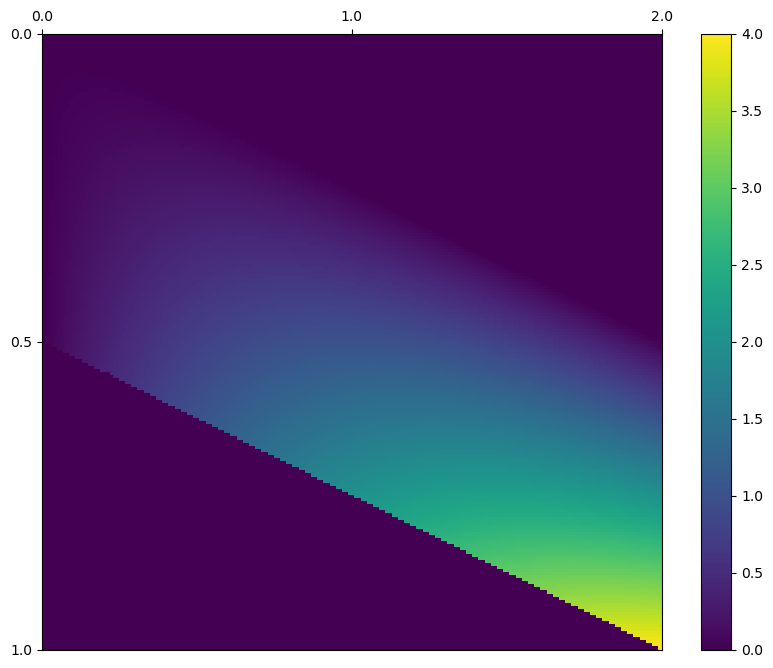

In [49]:
# 1) fxy >= 0  이건 어케 해석하는거징...?
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [ ]:
# multi integration -> nquad
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0] #1.3?

1.000

- Marginal Density Function

In [52]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0] # fix x 
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0] # fix y

In [53]:
X = [x_range, f_X]
Y = [y_range, f_Y]

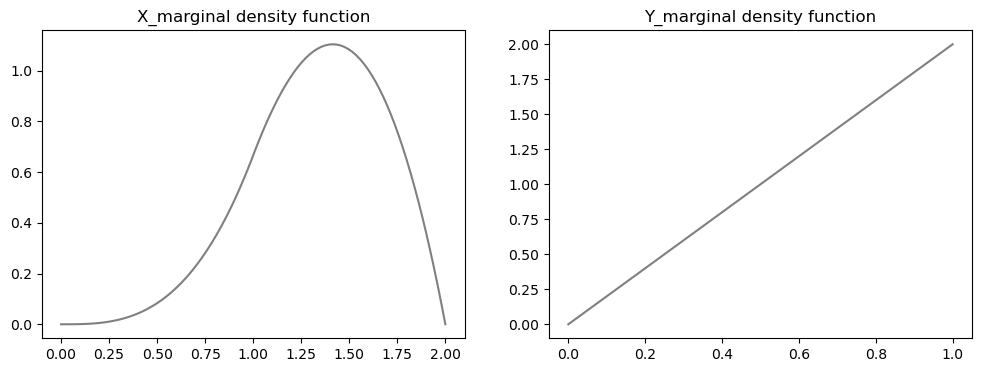

In [54]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()